In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("merge2.csv")
df.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [3]:
df.drop(["row_id","county_code","state"], axis=1, inplace=True)
df.pct_adult_smoking = df.pct_adult_smoking.fillna(df.pct_adult_smoking.median())
df.pct_low_birthweight = df.pct_low_birthweight.fillna(df.pct_low_birthweight.median())
df.pct_excessive_drinking = df.pct_excessive_drinking.fillna(df.pct_excessive_drinking.median())
df.homicides_per_100k = df.homicides_per_100k.fillna(df.homicides_per_100k.median())
df.motor_vehicle_crash_deaths_per_100k = df.motor_vehicle_crash_deaths_per_100k.fillna(df.motor_vehicle_crash_deaths_per_100k.median())
df.pop_per_dentist = df.pop_per_dentist.fillna(df.pop_per_dentist.median())
df.pop_per_primary_care_physician = df.pop_per_primary_care_physician.fillna(df.pop_per_primary_care_physician.median())
#df.median_property_value = df.median_property_value.fillna(df.median_property_value.median())
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
#df.air_pollution_particulate_matter_value = df.air_pollution_particulate_matter_value.fillna(df.air_pollution_particulate_matter_value.median())

#pred.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,...,0,0,0,0,0,0,1,0,0,1
1,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,...,0,0,0,0,0,0,1,0,1,0
2,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,...,0,0,0,0,0,0,0,1,0,1
3,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,...,0,0,0,0,0,0,1,0,1,0
4,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,...,0,1,0,1,0,0,0,0,1,0
5,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,0.076131,...,0,0,0,0,0,0,1,0,0,1
6,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,0.017288,...,0,0,1,0,0,0,0,0,1,0
7,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,0.023532,...,0,0,0,0,0,0,1,0,1,0
8,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,0.092045,...,0,0,0,0,1,0,0,0,0,1
9,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,0.017676,...,0,1,0,0,0,0,1,0,0,1


In [4]:
ev = df['evictions']
df.drop(labels=['evictions'], axis=1,inplace = True)
df.insert(0, 'evictions', ev)
df.head()

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,681,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,29,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,841,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,2,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0


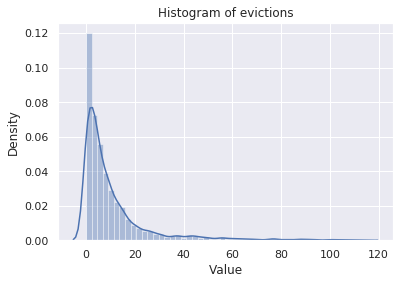

In [ ]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
df['evictions'] = np.sqrt(df['evictions'])
hist_plot(df['evictions'], 'evictions')

In [ ]:
df.dropna(axis = 0, inplace = True)
df

,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,26.095977,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0.000000,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,5.385165,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,29.000000,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,1.414214,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0
5,64.737933,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,...,0,0,0,0,0,0,1,0,0,1
6,4.898979,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,...,0,0,1,0,0,0,0,0,1,0
7,15.000000,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,...,0,0,0,0,0,0,1,0,1,0
8,9.643651,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,...,0,0,0,0,1,0,0,0,0,1
9,2.449490,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
data = df.values

Features = np.array(data[:, 1:])
Labels = np.array(data[:, 0])
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(2539, 70)
(2539,)


In [ ]:
from sklearn import feature_selection as fs
print(Features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.98 * (1 - .98)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(2539, 70)
[ True  True  True  True  True  True  True  True  True  True False False
 False False False  True False False False False False False False False
 False False  True  True  True  True  True  True False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
(2539, 48)


In [ ]:
nr.seed(123)
inside = ms.KFold(n_splits=3, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=3, shuffle = True)

In [ ]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha":[0.000001,0.00001,0.0001], 
              "early_stopping":[True, False], 
              "beta_1":[0.85,0.90,0.99], 
              "beta_2":[0.999,0.99,0.97]}

## Define the Neural Network model
nn_clf = MLPRegressor(hidden_layer_sizes = (100,100),
                       max_iter=400)

## Perform the grid search over the parameters
nr.seed(3456)
nn_clf = ms.GridSearchCV(estimator = nn_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)

nr.seed(6677)
nn_clf.fit(Features, Labels)
print(nn_clf.best_estimator_.alpha)
print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

0.0001
False
0.9
0.99


In [ ]:
nr.seed(498)
cv_estimate = ms.cross_val_score(nn_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 764)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape 

In [ ]:
nr.seed(1115)
nn_mod = MLPRegressor(hidden_layer_sizes = (100,100), 
                       alpha =nn_clf.best_estimator_.alpha, 
                       early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 400
                      #,solver='lbfgs'
                     )
nn_mod.fit(X_train, y_train)

In [ ]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = nn_mod.predict(X_test) 
print_metrics(y_test, y_score, 70) 

In [ ]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

In [ ]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [ ]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 